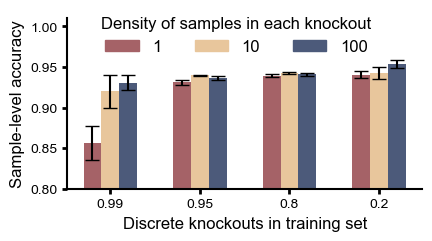

In [3]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import colormaps as cmaps
import matplotlib

# Set font settings
matplotlib.rcParams['font.family'] = "sans-serif"
matplotlib.rcParams['font.sans-serif'] = "Arial"

# Load data
summary = pd.read_csv('fig2e.csv')
data = summary

# Set up colors
N = 4
red = cmaps.lipari[128].colors
yellow = cmaps.lipari[225].colors
blue = cmaps.lipari[60].colors
color_palette = [red, yellow, blue]

# Create figure
fig, ax = plt.subplots(figsize=(4.42, 2.46))

# Set up bar chart parameters
bar_width = 0.2
x_positions = np.arange(len([0.99, 0.95, 0.8, 0.2]))

# Create grouped bars with error bars for each density level
for i, (density, color) in enumerate(zip([1, 10, 100], color_palette)):
    means = []
    errors = []
    
    # Calculate statistics for each discrete value
    for discrete in [0.99, 0.95, 0.8, 0.2]:
        group = data[(data.downsample == density) & (data.train_test_split == discrete)]
        means.append(group['sample_level_accuracy'].mean())
        errors.append(group['sample_level_accuracy'].sem())
    
    ax.bar(x_positions + i * bar_width, means, yerr=errors, color=color, width=bar_width,
           capsize=5, label=f'Density: {density}', edgecolor=None)

# Customize plot appearance
ax.set_ylim([0.8, 1.01])
ax.set_ylabel('Sample-level accuracy', fontsize=12)
ax.set_xlabel('Discrete knockouts in training set', fontsize=12)
ax.set_xticks(x_positions + bar_width)
ax.set_xticklabels(['0.99', '0.95', '0.8', '0.2'])
ax.xaxis.set_tick_params(width=2, labelsize=10)
ax.yaxis.set_tick_params(width=2, labelsize=10)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)

# Add legend
legend_custom = [mpatches.Patch(color=color_palette[i], label=density)
                 for i, density in enumerate(['1', '10', '100'])]
legend = ax.legend(handles=legend_custom, bbox_to_anchor=(0.9, 0.7), 
                  title='Density of samples in each knockout', 
                  fontsize=12, title_fontsize=12, ncol=3)
legend.get_frame().set_facecolor('none')
legend.get_frame().set_linewidth(0.0)

fig.tight_layout()
plt.show()